SOGComp is SOG run for comparison with SS2DSOG
Here we compare with a 1hr-run (run00_d)

In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGComp/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')

In [3]:
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

In [4]:
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=102)
# Timestamp in matplotlib time
# dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
print data

In [5]:
interval=float(interval)
print interval
print enumerate(data)

0.042


In [6]:
# Extract dataframe chunks into dictionary

for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))

In [7]:
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1)
tt,zz=np.meshgrid(t,-z)

In [8]:
print field_names

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


In [9]:
resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_00/'
fname='SalishSea_1h_20150301_20150301_grid_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)

In [10]:
print fkeys

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'sossheig', u'votemper', u'vosaline', u'rain_rate', u'snow_rate']


In [11]:
print f.variables['deptht'][:]

[   0.5    1.5    2.5    3.5    4.5    5.5    6.5    7.5    8.5    9.5
   10.5   11.5   12.5   13.5   14.5   15.5   16.5   17.5   18.5   19.5
   20.5   21.5   22.5   23.5   24.5   25.5   26.5   27.5   28.5   29.5
   30.5   31.5   32.5   33.5   34.5   35.5   36.5   37.5   38.5   39.5
   40.5   41.5   42.5   43.5   44.5   45.5   46.5   47.5   48.5   49.5
   50.5   51.5   52.5   53.5   54.5   55.5   56.5   57.5   58.5   59.5
   60.5   61.5   62.5   63.5   64.5   65.5   66.5   67.5   68.5   69.5
   70.5   71.5   72.5   73.5   74.5   75.5   76.5   77.5   78.5   79.5
   80.5   81.5   82.5   83.5   84.5   85.5   86.5   87.5   88.5   89.5
   90.5   91.5   92.5   93.5   94.5   95.5   96.5   97.5   98.5   99.5
  100.5]


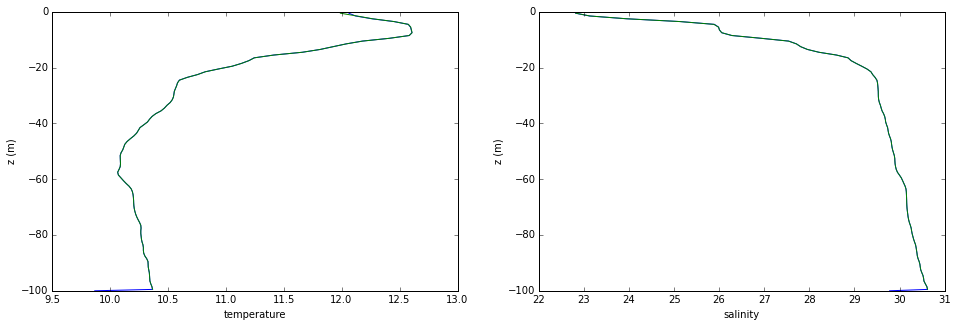

In [12]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

# Temperature
iii=1
pl0=axs[0].plot(da[:,iii,0],-z)
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['votemper'][:,:,:,:]
pl3=axs[0].plot(ivar[0,0:100,3,3],-zSS[0:100])

# Sal
iii=2
pl0=axs[1].plot(da[:,iii,0],-z,'-')
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['vosaline'][:,:,:,:]
pl3=axs[1].plot(ivar[0,0:100,3,3],-zSS[0:100],'-')


In [13]:
f.close()

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_00/'
fname='SalishSea_1h_20150301_20150301_ptrc_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print fkeys

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'DIC', u'Alkalini', u'O2', u'CaCO3', u'PO4', u'POC', u'Si', u'PHY', u'ZOO', u'DOC', u'PHY2', u'ZOO2', u'DSi', u'Fer', u'BFe', u'GOC', u'SFe', u'DFe', u'GSi', u'NFe', u'NCHL', u'DCHL', u'NO3', u'NH4']


[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan

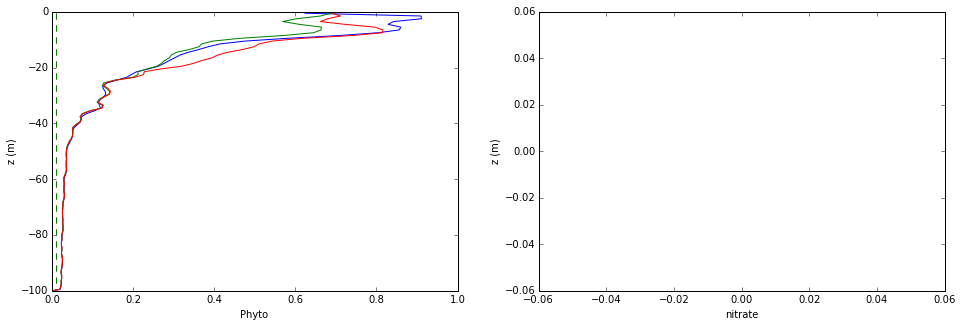

In [14]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

# Phyto
iii=4
pl0=axs[0].plot(da[:,iii,0],-z)
iii=5
pl0=axs[0].plot(da[:,iii,0],-z)
iii=6
pl0=axs[0].plot(da[:,iii,0],-z)
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['PHY'][:,:,:,:]
pl3=axs[0].plot(ivar[0,0:100,3,3],-zSS[0:100],'--',color='r')
ivar=f.variables['PHY2'][:,:,:,:]
pl3=axs[0].plot(ivar[0,0:100,3,3],-zSS[0:100],'--',color='g')
print ivar[0,0:100,3,3]

# NO
iii=8
#pl0=axs[1].plot(da[:,iii,0],-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1].plot(ivar[0,0:100,3,3],-zSS[0:100],'--',color='r')
print ivar[0,0:100,3,3]

In [16]:
print ivar[0,0:100,5,50]

[ 22.81864548  23.13420677  23.95239449  25.12596512  25.88291931
  25.98547363  26.00577354  26.05830193  26.28430176  26.93235016
  27.53629112  27.71227837  27.80780792  27.95894814  28.21292686
  28.60036278  28.85606194  28.92464828  29.03889275  29.16124153
  29.27748299  29.36497307  29.4040432   29.45615196  29.49731255
  29.51138306  29.5178299   29.52303886  29.52749825  29.52870941
  29.53032303  29.53698921  29.55214691  29.57543182  29.59220886
  29.6122818   29.64510727  29.67005348  29.68400192  29.69239807
  29.71196175  29.73492622  29.74540901  29.7564106   29.77647018
  29.80044556  29.81586456  29.8235321   29.8328228   29.84628868
  29.86475563  29.88345146  29.89347267  29.89676666  29.90121269
  29.91143799  29.9269371   29.95301628  29.99651337  30.03807831
  30.06742096  30.09510994  30.12324905  30.14278603  30.14984322
  30.1528759   30.1552887   30.15738678  30.15912247  30.16183472
  30.16648293  30.173563    30.18150711  30.18933678  30.20116425
  30.21724

4


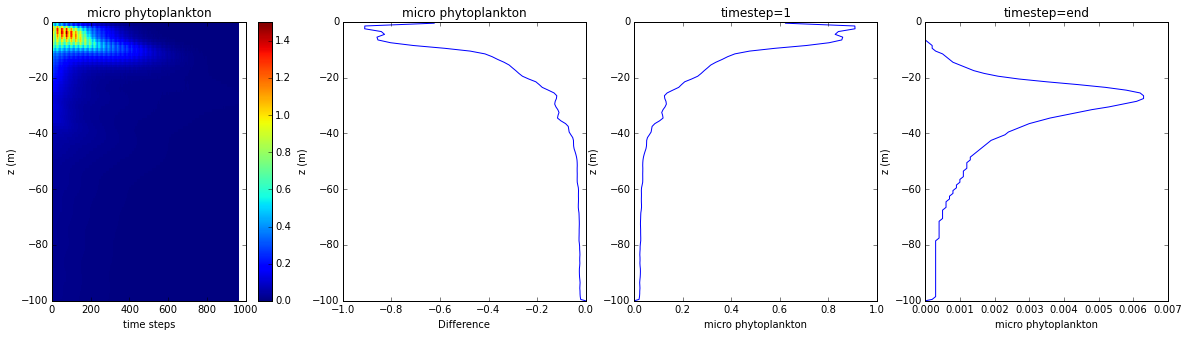

In [13]:
iii=4
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

5


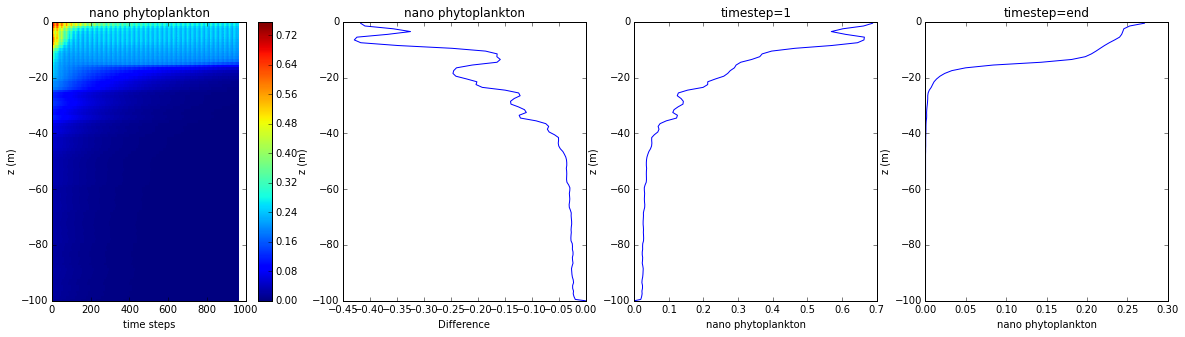

In [14]:
iii=5
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

6


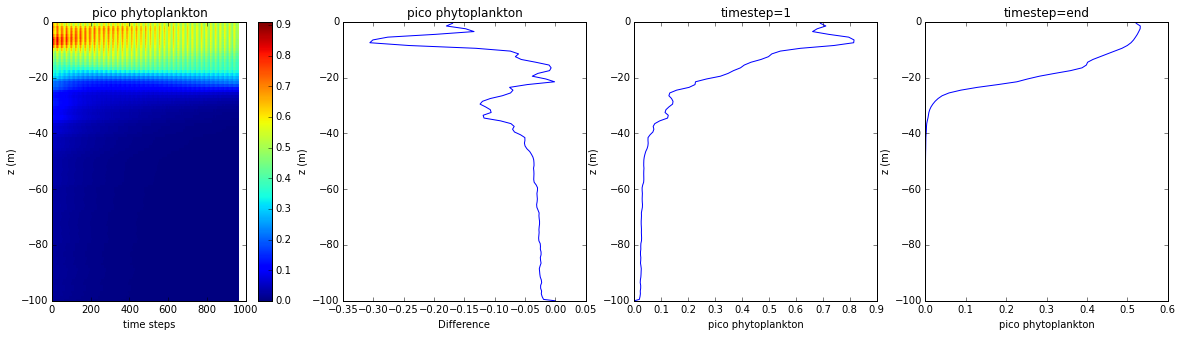

In [15]:
iii=6
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

7


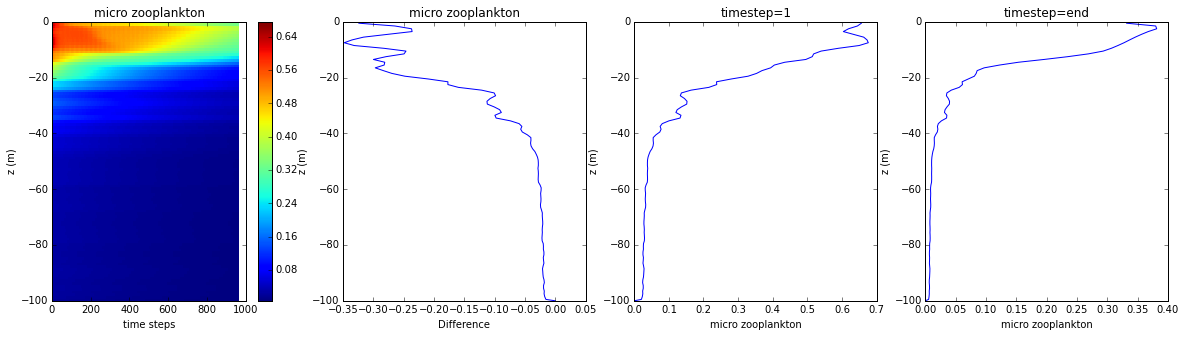

In [16]:
iii=7
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

8


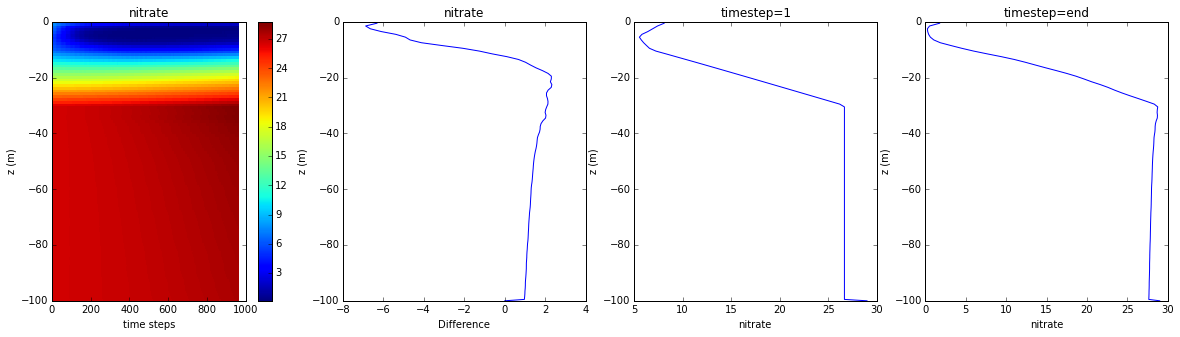

In [17]:
iii=8
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [20]:
print da[:,iii,0]

[  8.1089   8.1089   7.4143   6.9144   6.4138   5.805    5.5464   5.7413
   5.9834   6.2771   6.5841   7.2486   8.2882   9.3064  10.3266  11.3451
  12.3529  13.353   14.3517  15.3465  16.3398  17.3328  18.3218  19.3064
  20.291   21.2754  22.258   23.2395  24.2206  25.2017  26.1827  26.6734
  26.6738  26.6739  26.6739  26.6739  26.6738  26.6737  26.6736  26.6736
  26.6736  26.6735  26.6734  26.6734  26.6734  26.6733  26.6733  26.6732
  26.6732  26.6732  26.6732  26.6731  26.6731  26.6731  26.6731  26.6731
  26.6731  26.6731  26.6731  26.6731  26.6731  26.6731  26.6732  26.6732
  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732
  26.6732  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733
  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733
  26.6733  26.6734  26.6734  26.6734  26.6734  26.6734  26.6734  26.6734
  26.6734  26.6734  26.6734  26.6734  26.6734  29.    ]


9


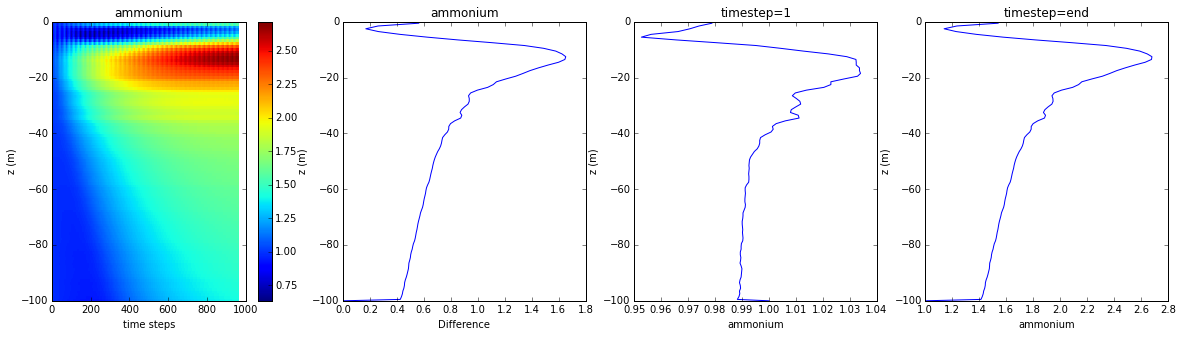

In [21]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

10


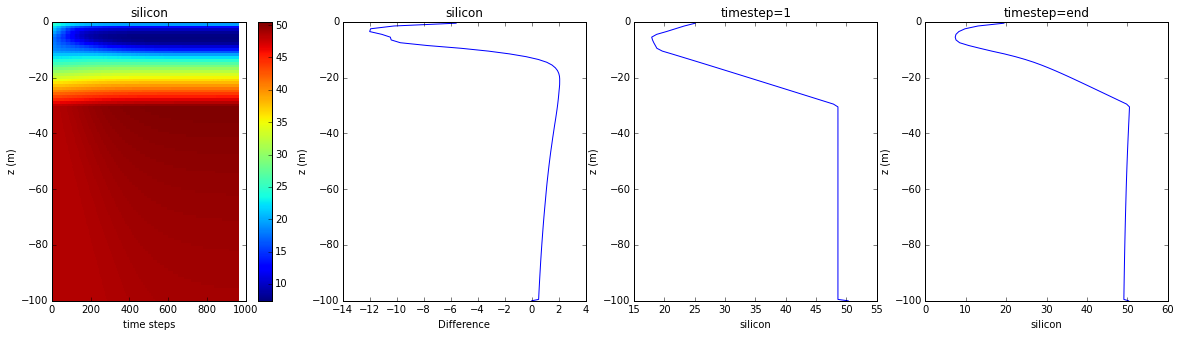

In [22]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

11


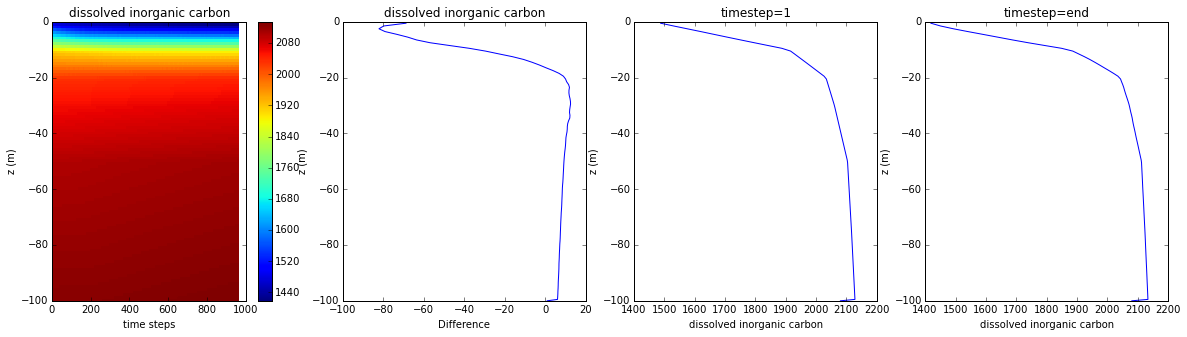

In [23]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

12


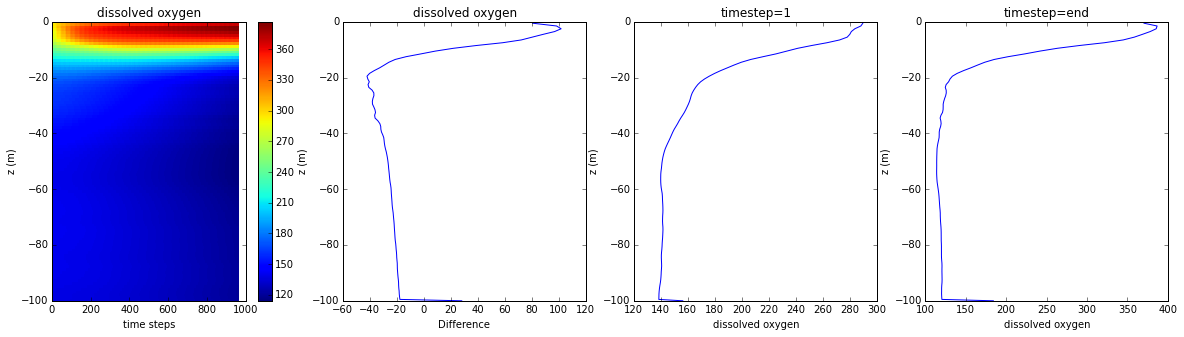

In [24]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

13


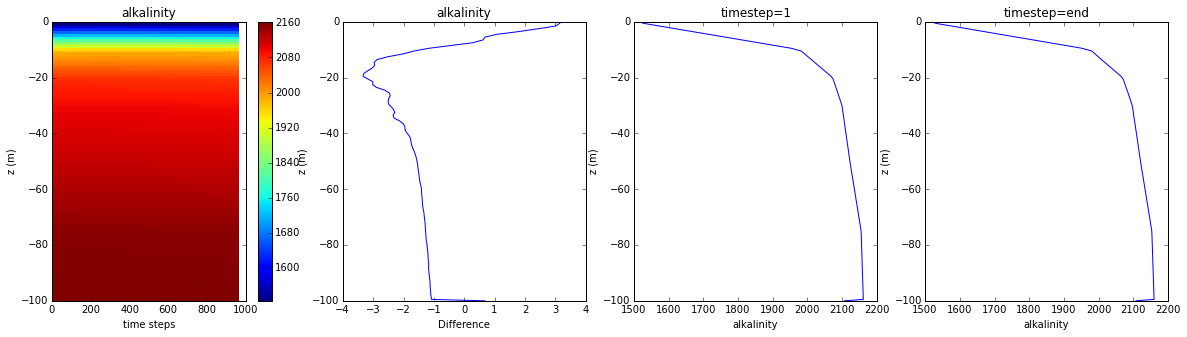

In [25]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

14


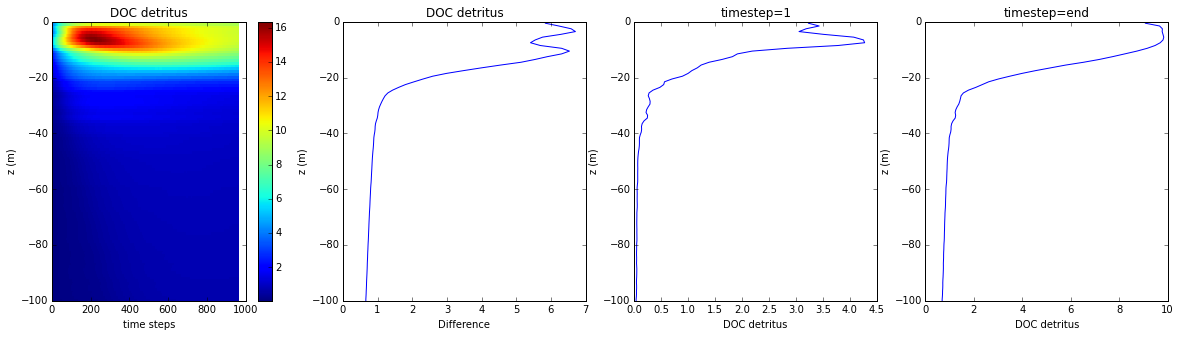

In [26]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

15


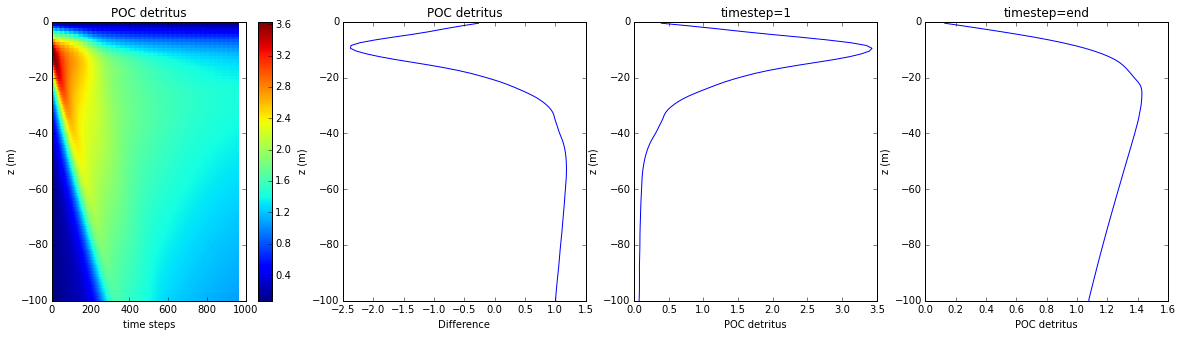

In [27]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

16


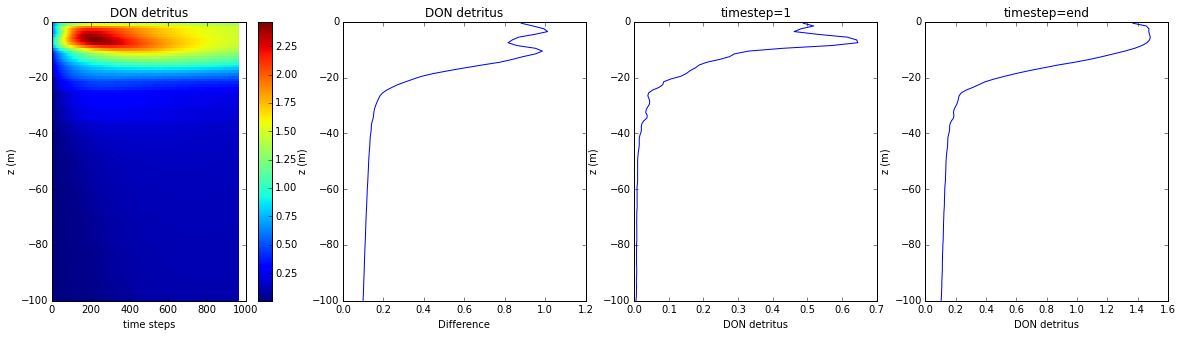

In [28]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

17


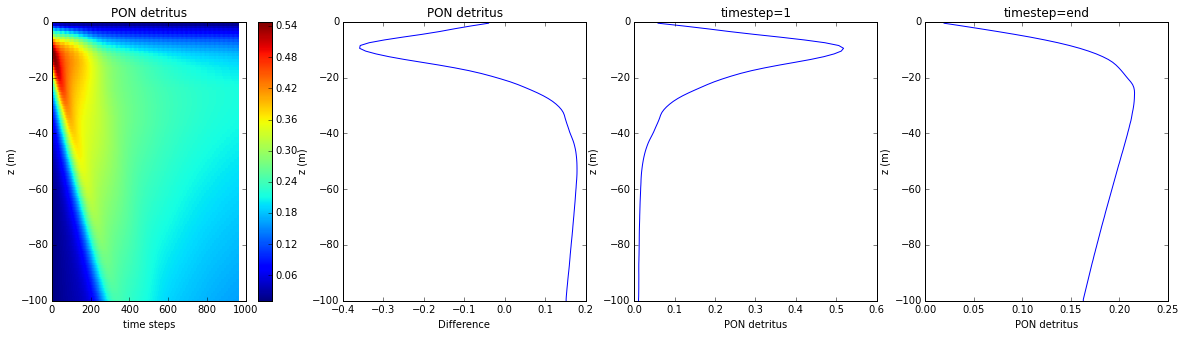

In [29]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

18


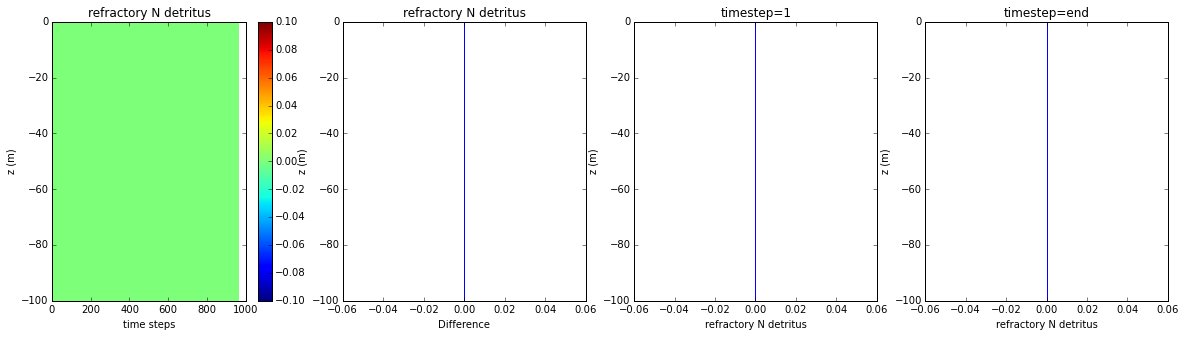

In [30]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

19


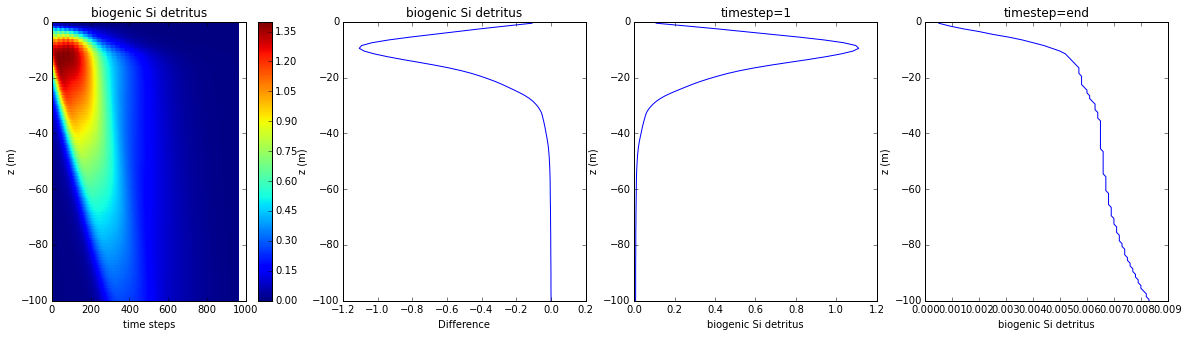

In [31]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [32]:
iii+=1
print iii


20


In [33]:
iii+=1
print iii


21


In [34]:
iii+=1
print iii


22


23


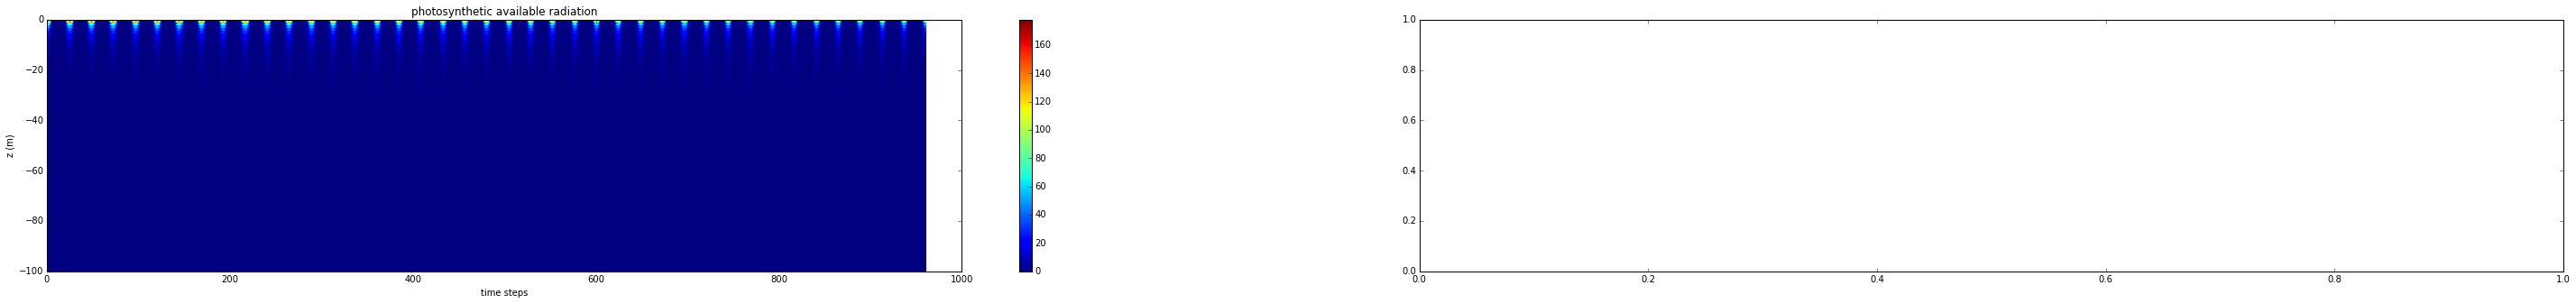

In [35]:
iii+=1
print iii

fig, axs = plt.subplots(1,2,figsize=(50,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])


In [36]:
iii+=1
print iii

24


In [37]:
iii+=1
print iii

25
